In [2]:
import os
import pandas as pd
current_dir = os.getcwd()
print("initial Working directory",current_dir)
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")
current_dir = os.getcwd()
print("Final Working Dir",current_dir)

initial Working directory h:\VScode\March Group\March_Team_Project\jupyter_notebooks
You set a new current directory
Final Working Dir h:\VScode\March Group\March_Team_Project


In [19]:
# load combined pollution and weather data from outputs
ML_data = pd.read_csv('Outputs/Merged_Data_PG_1.zip')
ML_data.head()

,State Code,County Code,Site Num,Address,State,County,City,Date,NO2 Units,NO2 Mean,...,WT13,WT16,WT18,WT22,WS_Latitude,WS_Longitude,WS_Elevation,WS_Name,CountryCode,CityDistance
0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,PHOENIX,2003-01-01,Parts per billion,40.000000,...,0.0,0.0,0.0,0.0,43.1500,-76.3333,115.5,BALDWINSVILLE,US,9.561566
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,PHOENIX,2003-01-01,Parts per billion,40.000000,...,0.0,0.0,0.0,0.0,43.2386,-76.1964,114.9,BREWERTON LOCK 23,US,8.114212
2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,PHOENIX,2003-01-02,Parts per billion,40.000000,...,0.0,0.0,0.0,0.0,43.1500,-76.3333,115.5,BALDWINSVILLE,US,9.561566
3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,PHOENIX,2003-01-02,Parts per billion,40.000000,...,0.0,0.0,0.0,0.0,43.2386,-76.1964,114.9,BREWERTON LOCK 23,US,8.114212
4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,PHOENIX,2003-01-03,Parts per billion,42.291667,...,0.0,0.0,0.0,0.0,43.1500,-76.3333,115.5,BALDWINSVILLE,US,9.561566


In [20]:
# Identify the columns that are not needed for the model
excludecolumns = ['State Code',
                  'County Code',
                  'Site Num',
                  'Address',
                  'County',
                  'City',
                  'NO2 Units',
                  'O3 Units',
                  'SO2 Units',
                  'CO Units',
                  'State',
                  'StationId',
                  'CountryCode',
                  'WS_Name',
    ]

# drop columns from ML_data in excludecolumns
ML_data = ML_data.drop(excludecolumns, axis=1)

# convert "Date" to datetime
ML_data['Date'] = pd.to_datetime(ML_data['Date'], format='%Y-%m-%d')

# add date functions for use in the model
ML_data['Year'] = ML_data['Date'].dt.year
ML_data['Month'] = ML_data['Date'].dt.month
ML_data['Day'] = ML_data['Date'].dt.day
ML_data['Dayofweek'] = ML_data['Date'].dt.dayofweek

# model the WT columns as binary columns
for col in ['WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT08', 'WT09', 'WT11', 'WT13', 'WT16', 'WT18', 'WT22']:
    ML_data[col] = ML_data[col].apply(lambda x: 1 if x == 1 else 0)


Try to encode seasonality through use of a ML model

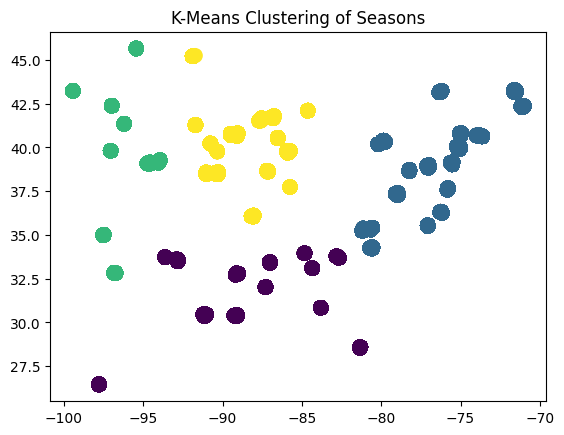

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Copy Data Set
ML_Data_Season = ML_data.copy()

# Feature Engineering
ML_Data_Season['day_of_year'] = ML_Data_Season['Date'].dt.dayofyear
ML_Data_Season['sin_day'] = np.sin(2 * np.pi * ML_Data_Season['day_of_year']/365)
ML_Data_Season['cos_day'] = np.cos(2 * np.pi * ML_Data_Season['day_of_year']/365)

# selecting features for clustering
features = ['WS_Latitude',
            'WS_Longitude',
            'sin_day',
            'cos_day',
            # 'PRCP',
            # 'TAVG',
            # 'TMAX',
            # 'TMIN',
            # 'WT01',
            # 'WT02',
            # 'WT03',
            # 'WT04',
            # 'WT05',
            # 'WT06',
            # 'WT08',
            # 'WT09',
            # 'WT11',
            # 'WT13',
            # 'WT16',
            # 'WT18',
            # 'WT22'
            ]



# K-Mean Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
ML_Data_Season['season_cluster'] = kmeans.fit_predict(ML_Data_Season[features])

# Plotting the Clusters
plt.scatter(ML_Data_Season['WS_Longitude'], ML_Data_Season['WS_Latitude'], c=ML_Data_Season['season_cluster'], s=100, cmap='viridis')
plt.title('K-Means Clustering of Seasons')
plt.show()

# update original ML_data with season cluster match on id
ML_data['season_cluster'] = ML_Data_Season['season_cluster']



In [ ]:
ML_Data_Season

In [25]:
ML_data2 = ML_Data_Season.copy()

In [ ]:
# Create A Decision Tree Model to Predict the NO2 AQI
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

ML_data2['day_of_year'] = ML_data2['Date'].dt.dayofyear
ML_data2['sin_day'] = np.sin(2 * np.pi * ML_data2['day_of_year']/365)
ML_data2['cos_day'] = np.cos(2 * np.pi * ML_data2['day_of_year']/365)

# select features for the model
target2 = 'NO2 AQI'
features2 = ['WS_Latitude',
            'WS_Longitude',
            'sin_day',
            'cos_day',
            'PRCP',
            'TAVG',
            'TMAX',
            'TMIN',
            'WT01',
            'WT02',
            'WT03',
            'WT04',
            'WT05',
            'WT06',
            'WT08',
            'WT09',
            'WT11',
            'WT13',
            'WT16',
            'WT18',
            'WT22', 
            'season_cluster'
            ]

# set X and y
X = ML_data2[features2]
y = ML_data2[target2]

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and fit the model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# save the model
import joblib
#replace space in target with _
target2 = target2.replace(' ', '_')
modelFIleName = f'Outputs/{target2}_DecisionTree_Model.pkl'

joblib.dump(model, modelFIleName)


Mean Squared Error: 109.84313170521321


['Outputs/NO2_DecisionTree_Model.pkl']

In [ ]:
# check the data for nulls
nullcount = ML_data.isnull().sum()

# if any of the values in nullcount are greater than 0, print the column name and the count of nulls
if nullcount[nullcount > 0].count() > 0:
    for column in nullcount[nullcount > 0].index:
        print(f'Column {column} has {nullcount[column]} null values')
        print(f'Filling null values with the mean of the column')
        ML_data[column].fillna(ML_data[column].mean(), inplace=True)
else:
    print('No columns have null values')

# identify any skewed columns
skew = ML_data.skew()

# if any of the values in skew are greater than 1 or less than -1, print the column name and the skew value
if skew[(skew > 1) | (skew < -1)].count() > 0:
    for column in skew[(skew > 1) | (skew < -1)].index:
        print(f'Column {column} has a skew of {skew[column]}')
else:
    print('No columns are skewed')

# Target variable
target = ML_data['NO2 AQI']

# Identify Related columns to target
# amy columns with a name starting with the same 3-4 letters are likely to be related
# to the target variable, so we can check the correlation of these columns to the target
# to see if they are related
related_columns = [col for col in ML_data.columns if col[:3] == 'NO2']
correlations = ML_data[related_columns].corrwith(target)

# print related_columns and drop them from the data
print(related_columns)
ML_data = ML_data.drop(related_columns, axis=1)

# check the data types of the columns
datatypes = ML_data.dtypes

# if the datatype is an object, print the column name and the datatype
if datatypes[datatypes == 'object'].count() > 0:
    for column in datatypes[datatypes == 'object'].index:
        print(f'Column {column} is an object')
else:
    print('No columns are objects')

# create a viable list of columns to use in the model
# drop columns that are objects
ML_data_Features = ML_data.drop(datatypes[datatypes == 'object'].index, axis=1)

# drop columns that are not numeric
ML_data_Features = ML_data.drop(datatypes[datatypes != 'object'].index, axis=1)

# Build a transformation pipeline to correct the skewness of the data and then scale the data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Power
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import Quant
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

# create a list of columns that are skewed
skewed_columns = skew[(skew > 1) | (skew < -1)].index

# create a list of columns that are not skewed
non_skewed_columns = skew[(skew <=
                           1) & (skew >= -1)].index

# create a list of columns that are not skewed and are not the target variable
non_skewed_columns = non_skewed_columns.drop(target)

# create a list of columns that are not skewed and are not the target variable
skewed_columns = skewed_columns.drop(target)

# using the 2 lists just created build a column transformer
# that will apply a power transform to the skewed columns
# and a standard scaler to the non skewed columns
preprocessor = ColumnTransformer(
    transformers=[
        ('power', PowerTransformer(), skewed_columns),
        ('scaler', StandardScaler(), non_skewed_columns)
    ])

# create a pipeline that will apply the column transformer
# and then scale the target variable

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler())
])

# create a transformed target regressor that will apply the pipeline
# to the data
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

target_regressor = TransformedTargetRegressor(regressor=regressor,
                                              transformer=pipeline)

# split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ML_data_Features,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=42)

# fit the model to the training data
target_regressor.fit(X_train, y_train)

# predict the target variable using the testing data
y_pred = target_regressor.predict(X_test)

# evaluate the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2: {r2}')

# save the model
import joblib

modelname = f'ML_Models/{target}_Model.pkl'
joblib.dump(target_regressor, modelname)

# save the pipeline
pipelinename = f'ML_Models/{target}_Pipeline.pkl'
joblib.dump(pipeline, pipelinename)
print(f'Model saved as {modelname}')
print(f'Pipeline saved as {pipelinename}')
